<a href="https://colab.research.google.com/github/i-supermario/dengAI/blob/main/Dengue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
X = pd.read_csv("/content/dengue_features_train.csv")
Y = pd.read_csv("/content/dengue_labels_train.csv")
Test = pd.read_csv("/content/dengue_features_test.csv")
Output = Test[['city','year','weekofyear']]

In [ ]:
df = pd.concat([X, Y['total_cases']], axis=1)

In [ ]:
import datetime
def timechange(df):
  df.drop(columns=['year','weekofyear'],inplace=True)
  df.interpolate(inplace=True)
  df['week_start_date'] = pd.to_datetime(df['week_start_date'])
  df['week_start_date'] = df['week_start_date'].dt.strftime('%d.%m.%Y')
  df['year'] = pd.DatetimeIndex(df['week_start_date']).year
  df['month'] = pd.DatetimeIndex(df['week_start_date']).month
  df['day'] = pd.DatetimeIndex(df['week_start_date']).day
  df['dayofyear'] = pd.DatetimeIndex(df['week_start_date']).dayofyear
  df['weekofyear'] = pd.DatetimeIndex(df['week_start_date']).weekofyear
  df['weekday'] = pd.DatetimeIndex(df['week_start_date']).weekday
  df['quarter'] = pd.DatetimeIndex(df['week_start_date']).quarter
  df['is_month_start'] = pd.DatetimeIndex(df['week_start_date']).is_month_start
  df['is_month_end'] = pd.DatetimeIndex(df['week_start_date']).is_month_end
  df.drop(columns=['week_start_date'],inplace=True)
  return df

In [ ]:
df = timechange(df)
Test = timechange(Test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
df

,city,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,year,month,day,dayofyear,weekofyear,weekday,quarter,is_month_start,is_month_end
0,sj,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,1990,4,30,120,18,0,2,False,True
1,sj,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,1990,7,5,186,27,3,3,False,False
2,sj,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4,1990,5,14,134,20,0,2,False,False
3,sj,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3,1990,5,21,141,21,0,2,False,False
4,sj,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6,1990,5,28,148,22,0,2,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,296.825714,309.7,294.5,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5,2010,5,28,148,21,4,2,False,False
1452,iq,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,296.452857,308.5,291.9,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8,2010,4,6,96,14,1,2,False,False
1453,iq,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,295.501429,305.5,292.4,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1,2010,11,6,310,44,5,4,False,False
1454,iq,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,297.521429,295.324286,306.1,291.9,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1,2010,6,18,169,24,4,2,False,False


In [ ]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap,vmin=-1 ,vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
col = df.pop('total_cases')
df['total_cases']=col

In [ ]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   ndvi_ne                                1456 non-null   float64
 2   ndvi_nw                                1456 non-null   float64
 3   ndvi_se                                1456 non-null   float64
 4   ndvi_sw                                1456 non-null   float64
 5   precipitation_amt_mm                   1456 non-null   float64
 6   reanalysis_air_temp_k                  1456 non-null   float64
 7   reanalysis_avg_temp_k                  1456 non-null   float64
 8   reanalysis_dew_point_temp_k            1456 non-null   float64
 9   reanalysis_max_air_temp_k              1456 non-null   float64
 10  reanalysis_min_air_temp_k              1456 non-null   float64
 11  rean

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ['is_month_start','is_month_end',]:
  X[col] = le.fit_transform(X[col])
  Test[col] = le.transform(Test[col])


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[['ndvi_ne', 	'ndvi_nw' ,	'ndvi_se' 	,'ndvi_sw','year','precipitation_amt_mm',	'reanalysis_air_temp_k','reanalysis_avg_temp_k',		'reanalysis_dew_point_temp_k',	'reanalysis_max_air_temp_k',	'reanalysis_min_air_temp_k',	'reanalysis_precip_amt_kg_per_m2',	'reanalysis_relative_humidity_percent',		'station_avg_temp_c',	'station_diur_temp_rng_c',	'station_max_temp_c'	,'station_min_temp_c'	,'station_precip_mm','reanalysis_sat_precip_amt_mm','reanalysis_specific_humidity_g_per_kg','reanalysis_tdtr_k','year', 	'month', 	'day', 	'dayofyear', 	'weekofyear', 	'weekday' ,	'quarter' ,	'is_month_start' ,	'is_month_end']] = sc.fit_transform(X[['ndvi_ne', 	'ndvi_nw' ,	'ndvi_se' 	,'ndvi_sw','year','precipitation_amt_mm',	'reanalysis_air_temp_k','reanalysis_avg_temp_k',		'reanalysis_dew_point_temp_k',	'reanalysis_max_air_temp_k',	'reanalysis_min_air_temp_k',	'reanalysis_precip_amt_kg_per_m2',	'reanalysis_relative_humidity_percent',		'station_avg_temp_c',	'station_diur_temp_rng_c',	'station_max_temp_c'	,'station_min_temp_c'	,'station_precip_mm','reanalysis_sat_precip_amt_mm','reanalysis_specific_humidity_g_per_kg','reanalysis_tdtr_k','year', 	'month', 	'day', 	'dayofyear', 	'weekofyear', 	'weekday' ,	'quarter' ,	'is_month_start' ,	'is_month_end']])
Test[['ndvi_ne', 	'ndvi_nw' ,	'ndvi_se' 	,'ndvi_sw','year','precipitation_amt_mm',	'reanalysis_air_temp_k','reanalysis_avg_temp_k',		'reanalysis_dew_point_temp_k',	'reanalysis_max_air_temp_k',	'reanalysis_min_air_temp_k',	'reanalysis_precip_amt_kg_per_m2',	'reanalysis_relative_humidity_percent',		'station_avg_temp_c',	'station_diur_temp_rng_c',	'station_max_temp_c'	,'station_min_temp_c'	,'station_precip_mm','reanalysis_sat_precip_amt_mm','reanalysis_specific_humidity_g_per_kg','reanalysis_tdtr_k','year', 	'month', 	'day', 	'dayofyear', 	'weekofyear', 	'weekday' ,	'quarter' ,	'is_month_start' ,	'is_month_end']] = sc.transform(Test[['ndvi_ne', 	'ndvi_nw' ,	'ndvi_se' 	,'ndvi_sw','year','precipitation_amt_mm',	'reanalysis_air_temp_k','reanalysis_avg_temp_k',		'reanalysis_dew_point_temp_k',	'reanalysis_max_air_temp_k',	'reanalysis_min_air_temp_k',	'reanalysis_precip_amt_kg_per_m2',	'reanalysis_relative_humidity_percent',		'station_avg_temp_c',	'station_diur_temp_rng_c',	'station_max_temp_c'	,'station_min_temp_c'	,'station_precip_mm','reanalysis_sat_precip_amt_mm','reanalysis_specific_humidity_g_per_kg','reanalysis_tdtr_k','year', 	'month', 	'day', 	'dayofyear', 	'weekofyear', 	'weekday' ,	'quarter' ,	'is_month_start' ,	'is_month_end']])


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(columnTransformer.fit_transform(X))
Test = np.array(columnTransformer.transform(Test))

In [ ]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,0.0,1.0,-0.064786,-0.201759,-0.063003,-0.291701,-0.762715,-0.827485,-1.173749,-1.855390,-1.120084,0.070973,-0.187666,-1.231835,-0.762715,-1.773404,-0.641541,-1.357549,-0.562117,-1.555591,-1.336346,-0.494237,-2.040448,-0.699558,1.681312,-0.566561,-0.565380,-1.389687,-0.446109,-0.2,7.014763
1,0.0,1.0,0.279903,0.120167,-0.552809,-0.556863,-0.524381,-0.357744,-0.618171,-0.847712,-0.779742,0.266428,-0.512390,-0.671974,-0.524381,-0.890533,-0.714149,-0.364770,-0.810647,-0.381174,0.064942,-0.650786,-2.040448,0.160709,-1.171956,0.055424,0.028126,0.098825,0.452280,-0.2,-0.142556
2,0.0,1.0,-0.723193,0.377974,-0.622730,-0.372861,-0.255798,0.061555,-0.272353,0.124378,-0.903502,0.618248,-0.323930,-0.016805,-0.255798,0.067457,-0.734317,-0.364770,-0.756911,-0.125866,0.447111,0.043108,-2.040448,-0.412802,-0.144780,-0.434625,-0.433490,-1.389687,-0.446109,-0.2,-0.142556
3,0.0,1.0,-0.020820,0.981638,0.331185,0.406447,-0.695340,0.212881,0.005436,0.042903,-0.625041,0.500975,-0.605697,-0.256774,-0.695340,-0.046612,-0.698014,0.226436,-0.622570,0.435812,0.765586,-0.748100,-2.040448,-0.412802,0.654135,-0.368657,-0.367544,-1.389687,-0.446109,-0.2,-0.142556
4,0.0,1.0,0.471559,1.125088,0.651740,0.543686,-0.875006,0.603806,0.351254,0.378171,-0.470340,0.696430,-0.644959,-0.239591,-0.875006,0.302085,-0.532630,1.375382,0.599929,1.303860,1.147755,-0.710021,-2.040448,-0.412802,1.453050,-0.302689,-0.301599,-1.389687,-0.446109,-0.2,-0.142556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,1.0,0.0,1.539512,1.599814,0.721469,1.084940,0.219952,0.468243,1.229973,1.036533,1.942995,-0.476301,0.112577,0.922091,0.219952,1.130241,1.383403,1.133694,1.804516,1.508107,0.192332,-0.261528,1.658833,-0.412802,1.453050,-0.302689,-0.367544,0.594996,-0.446109,-0.2,-0.142556
1452,1.0,0.0,0.208903,0.272518,-0.909582,0.283893,0.934265,-0.270522,0.135826,0.792105,1.571713,-1.492668,3.856379,1.318510,0.934265,0.860372,0.725901,0.196689,1.130574,1.150675,-0.253533,-0.058437,1.658833,-0.699558,-1.057826,-0.792738,-0.829160,-0.893516,-0.446109,-0.2,-0.142556
1453,1.0,0.0,0.842169,0.152671,0.640312,0.380430,0.303369,-1.544182,-1.292801,0.168394,0.643507,-1.297213,0.241913,1.693349,0.303369,0.171324,0.733968,-2.171851,-0.562117,-0.125866,-1.845906,-0.676172,1.658833,1.307732,-1.057826,1.224004,1.149193,1.091167,1.350669,-0.2,-0.142556
1454,1.0,0.0,1.475123,0.987538,1.027109,1.479986,0.320098,-1.730187,-1.349492,0.052268,0.829148,-1.492668,0.512825,1.746498,0.320098,0.046127,0.838846,-1.364986,0.299902,-0.636482,-0.699397,-0.494237,1.658833,-0.126046,0.311743,-0.104784,-0.169709,0.594996,-0.446109,-0.2,-0.142556


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=0)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
Y_train = Y_train.to_numpy()
Y_test = Y_test.to_numpy()

In [ ]:
df.isnull().sum()

# **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
Y_pred = np.int64(regressor.predict(X_test))
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(Y_test,Y_pred))

22.52054794520548


In [ ]:
Output['total_cases'] = regressor.predict(Test)

In [ ]:
Output.to_csv("/content/Output.csv",index=False)

In [ ]:
Output

,city,year,weekofyear,total_cases
0,sj,2008,18,816.305176
1,sj,2008,19,811.472656
2,sj,2008,20,809.083984
3,sj,2008,21,808.596680
4,sj,2008,22,813.231934
...,...,...,...,...
411,iq,2013,22,810.857910
412,iq,2013,23,816.520508
413,iq,2013,24,815.509766
414,iq,2013,25,793.594238


# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=8,random_state=0)
regressor.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=8, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
Y_pred = np.int64(regressor.predict(X_test))
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(Y_test,Y_pred))

23.65068493150685


In [ ]:
Output['total_cases'] = np.int64(regressor.predict(Test))
Output.to_csv("/content/Output.csv",index=False)

In [ ]:
Output

,city,year,weekofyear,total_cases
0,sj,2008,18,9
1,sj,2008,19,8
2,sj,2008,20,9
3,sj,2008,21,8
4,sj,2008,22,9
...,...,...,...,...
411,iq,2013,22,10
412,iq,2013,23,10
413,iq,2013,24,4
414,iq,2013,25,9


# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train,Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
Y_pred = np.int64(regressor.predict(X_test))
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(Y_test,Y_pred))

29.47945205479452


# XGBoost

In [ ]:
from xgboost import XGBRegressor
regressor = XGBRegressor()
regressor.fit(X_train,Y_train)

[12:04:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
Y_pred = np.int64(regressor.predict(X_test))
print(mean_absolute_error(Y_test,Y_pred))

20.095890410958905


# Deep Learning

In [ ]:
import torch.nn as nn

In [ ]:
class Model(nn.Module):
  def __init__(self, inputSize , outputSize):
    super(Model, self).__init__()
    self.layers = nn.Sequential(
        nn.Linear(inputSize,52),
        nn.ReLU(),
        nn.Linear(52,52),
        nn.ReLU(),
        nn.Linear(52,outputSize)
        )
  def forward(self,x):
    output = self.layers(x)
    return output

In [ ]:
inputSize = 26
outputSize = 1
LR = 0.000005
epochs = 100
model = Model(inputSize=inputSize, outputSize=outputSize)
if torch.cuda.is_available():
    model.cuda()


In [ ]:
criterion = nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=LR)

In [ ]:
from torch.autograd import Variable
for epoch in range(epochs):
  if torch.cuda.is_available():
    inputs = Variable(torch.from_numpy(X_train).cuda())
    labels = Variable(torch.from_numpy(Y_train).cuda())
  else:
    inputs = Variable(torch.from_numpy(X_train))
    labels = Variable(torch.from_numpy(Y_train))
  optimizer.zero_grad()
  outputs = model(inputs.float())
  loss = criterion(outputs, labels.float())
  loss.backward()
  optimizer.step()
  if epoch % 5==0:
    print('epoch {}, loss {}'.format(epoch, loss.item()))
    


epoch 0, loss 1863.0220947265625
epoch 5, loss 2383.96923828125
epoch 10, loss 1857.7232666015625
epoch 15, loss 1848.406982421875
epoch 20, loss 1848.3978271484375
epoch 25, loss 1848.3975830078125
epoch 30, loss 1848.3973388671875
epoch 35, loss 1848.3970947265625
epoch 40, loss 1848.3968505859375
epoch 45, loss 1848.396484375
epoch 50, loss 1848.3961181640625
epoch 55, loss 1848.3958740234375
epoch 60, loss 1848.395751953125
epoch 65, loss 1848.3955078125
epoch 70, loss 1848.3951416015625
epoch 75, loss 1848.394775390625
epoch 80, loss 1848.3946533203125
epoch 85, loss 1848.3944091796875
epoch 90, loss 1848.3941650390625
epoch 95, loss 1848.3939208984375


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:528: UserWarning: Using a target size (torch.Size([1383])) that is different to the input size (torch.Size([1383, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


# Time Series Work

In [ ]:
df.drop(columns=['year','weekofyear'],inplace=True)
df.week_start_date = pd.to_datetime(df.week_start_date)

In [ ]:
df.set_index('week_start_date',inplace=True)

,city,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
week_start_date,,,,,,,,,,,,,,,,,,,,,,
1990-04-30,sj,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1990-05-07,sj,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
1990-05-14,sj,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
1990-05-21,sj,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
1990-05-28,sj,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-05-28,iq,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,300.771429,296.825714,309.7,294.5,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
2010-06-04,iq,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,299.392857,296.452857,308.5,291.9,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
2010-06-11,iq,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,297.592857,295.501429,305.5,292.4,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1


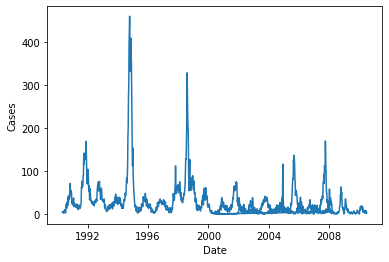

In [ ]:
plt.plot(df.total_cases)
plt.xlabel('Date')
plt.ylabel('Cases')
plt.show()